# 01.2 GLM&LogisticRegression for kidney dataset
### 賴昱瑋, 2020
- Sources - Kidney dataset: https://archive.ics.uci.edu/ml/datasets/Chronic_Kidney_Disease#
- Packages: pandas, numpy, matplotlib, random, sklearn
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random 

kidney = pd.read_excel('01.2_kidney.xlsx', header= None)
kidney.columns = [  
    'age', 
    'blood pressure',
    'specific gravity',
    'albumin',
    'sugar',
    'red blood cells',
    'pus cell',
    'pus cell clumps',
    'bacteria',
    'blood glucose random',
    'blood urea',
    'serum creatinine',
    'sodium',
    'potassium',
    'hemoglobin',
    'packed cell volume',
    'white blood cell count',
    'red blood cell count',
    'hypertension',
    'diabetes mellitus',
    'coronary artery disease',
    'appetite',
    'pedal edema',
    'anemia',
    'class']
kidney.head()

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
0,48,80,1.02,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.02,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.01,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.01,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd


---
## 2-1 The descriptive statistics of 'kidney'
### Simple check of the properteis of each column

In [2]:
kidney.describe().transpose()

,count,unique,top,freq
age,400,77,60,19
blood pressure,400,11,80,116
specific gravity,400,6,1.02,106
albumin,400,7,0,199
sugar,400,7,0,290
red blood cells,400,3,normal,201
pus cell,400,3,normal,259
pus cell clumps,400,3,notpresent,354
bacteria,400,3,notpresent,374
blood glucose random,400,147,?,44


- According to the report, there are many missing values in each variable. The further analyis is reported below:
### Check the count of missing value for each variables

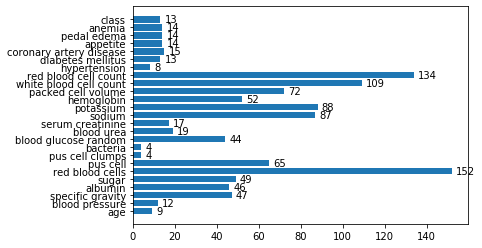

In [3]:
def plt_na_dist(df):
    count_na = lambda col : len(df[kidney[col].isnull()]) + len(df[df[col] == '?'])
    na_dis = pd.DataFrame(columns=('colname', 'Count_NA'))

    for col in kidney:
        na_dis = na_dis.append(pd.DataFrame([[col, int(count_na(col))]], columns=['colname', 'Count_NA']),ignore_index=True)

    plt.barh(np.arange(len(na_dis['colname'])), na_dis['Count_NA'], tick_label = na_dis['colname'])
    for x, y in enumerate(na_dis['Count_NA']): plt.text(y+2, x, str(y),va='center')
    plt.show()
    
plt_na_dist(kidney)

### Further analysis of each variable
- Plot to check the distribution
- Plot to check number of each category and missing value
- Check the descriptive statistics

In [4]:
# Function for Plot - Histogram
def hist_plot(col, b):
    df = kidney[kidney[col] != '?'][col]
    plt.hist(df, bins = b)

    ax = plt.axes(facecolor = '#E5E5E5')
    ax.set_axisbelow(True)
    plt.grid(color = 'w', linestyle = 'solid')
    ax.hist(df, bins = b, edgecolor = '#E5E5E5', color = '#E3A037')
    plt.show()
    
# Function for Plot - Boxplot
def box_plot(col):
    plt.boxplot(kidney[kidney[col] != '?'][col])
    plt.xticks([1], [col])
    plt.show()

# Function for Dscriptive Statistics
def summary(col):
    print('mean: \t', kidney[kidney[col] != '?'][col].mean())
    print('std: \t', kidney[kidney[col] != '?'][col].std())
    print('min: \t', kidney[kidney[col] != '?'][col].min())
    print('25%: \t', np.percentile(kidney[kidney[col] != '?'][col], 25))
    print('50%: \t', kidney[kidney[col] != '?'][col].median())
    print('75%: \t', np.percentile(kidney[kidney[col] != '?'][col], 75))
    print('max: \t', kidney[kidney[col] != '?'][col].max())

In [5]:
# Function for  Plot - Compare categories with "Class"
def plot_category_class(col):
    df = kidney.groupby([col, 'class']).size().reset_index(name='size')
    df['col_class'] = df[col] + '_' + df['class']
    plt.bar(df['col_class'], df['size'])
    plt.show()

1.Age(numerical)
age in years

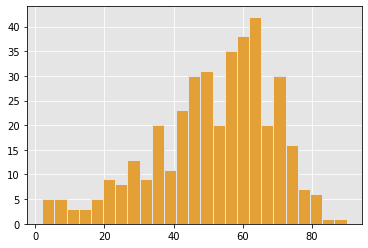

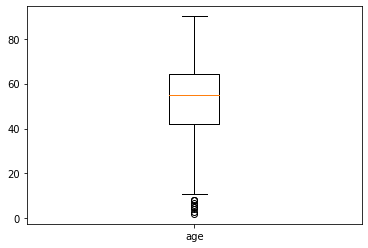

mean: 	 51.48337595907928
std: 	 17.16971408926224
min: 	 2
25%: 	 42.0
50%: 	 55.0
75%: 	 64.5
max: 	 90


In [6]:
hist_plot('age', 25)
box_plot('age')
summary('age')



2.Blood Pressure(numerical)
bp in mm/Hg

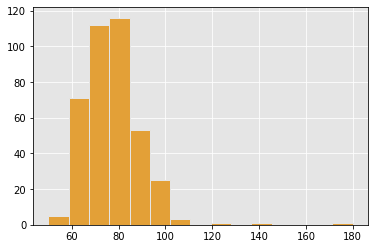

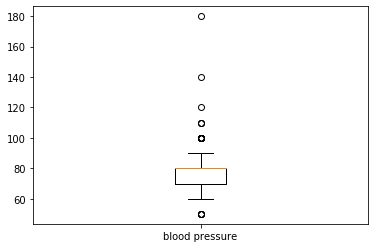

mean: 	 76.46907216494846
std: 	 13.683637493525262
min: 	 50
25%: 	 70.0
50%: 	 80.0
75%: 	 80.0
max: 	 180


In [7]:
hist_plot('blood pressure', 15)
box_plot('blood pressure')
summary('blood pressure')

In [8]:
bp_nan = (kidney[kidney['blood pressure'] != '?'])
bp_nan[bp_nan['blood pressure'] >= 76 + 4*14]
# According to the table upon, all extreme values of 'blood pressure' are also in the 'ckd' category for the 'class' variable.
# should not be removed

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
98,50,140,?,?,?,?,?,notpresent,notpresent,101,...,18,5800,2.3,yes,yes,no,poor,no,yes,ckd
99,56,180,?,0,4,?,abnormal,notpresent,notpresent,298,...,32,10400,4.2,yes,yes,no,poor,yes,no,ckd


3.Specific Gravity(nominal)
sg - (1.005,1.010,1.015,1.020,1.025)

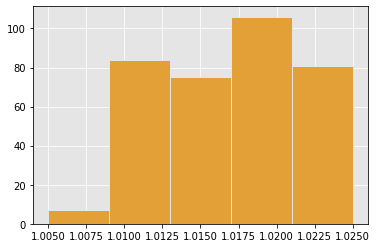

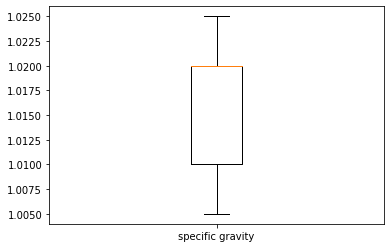

mean: 	 1.0174079320113256
std: 	 0.0057166169743763555
min: 	 1.005
25%: 	 1.01
50%: 	 1.02
75%: 	 1.02
max: 	 1.025


In [9]:
hist_plot('specific gravity', 5)
box_plot('specific gravity')
summary('specific gravity')

4.Albumin(nominal)
al - (0,1,2,3,4,5)

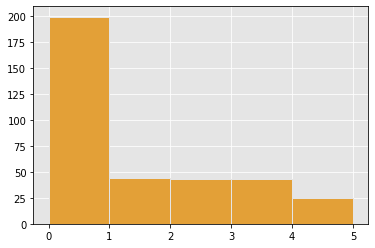

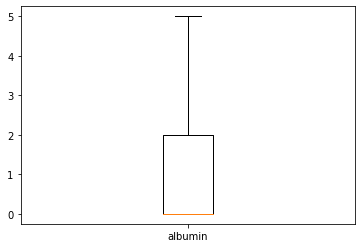

mean: 	 1.0169491525423728
std: 	 1.3526789127628456
min: 	 0
25%: 	 0.0
50%: 	 0.0
75%: 	 2.0
max: 	 5


In [10]:
hist_plot('albumin', 5)
box_plot('albumin')
summary('albumin')

5.Sugar(nominal)
su - (0,1,2,3,4,5)

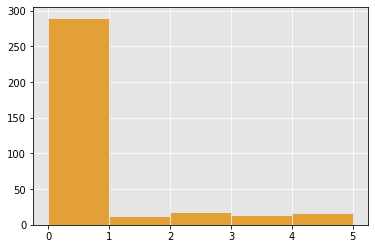

mean: 	 0.45014245014245013
std: 	 1.099191251885407
min: 	 0
25%: 	 0.0
50%: 	 0.0
75%: 	 0.0
max: 	 5


In [11]:
hist_plot('sugar', 5)
summary('sugar')

6.Red Blood Cells(nominal)
rbc - (normal,abnormal)

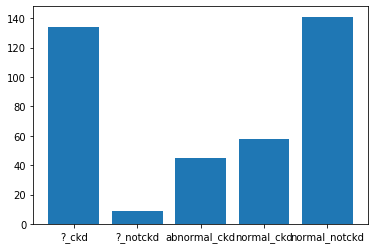

In [12]:
plot_category_class('red blood cells')

- The distribution of 'red blood cell count' which 'red blood cells' is ***normal***

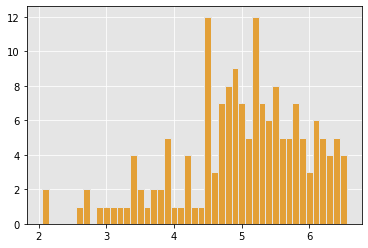

In [13]:
kidney_red_blood0 = kidney.groupby(['red blood cells', 'red blood cell count', 'class']).size().reset_index(name='size')

kidney_red_blood = kidney_red_blood0[kidney_red_blood0['red blood cells'] != '?']
kidney_red_blood = kidney_red_blood0[kidney_red_blood0['red blood cell count'] != '?']

ax = plt.axes(facecolor = '#E5E5E5')
ax.set_axisbelow(True)
plt.grid(color = 'w', linestyle = 'solid')
plt.bar(kidney_red_blood[kidney_red_blood['red blood cells'] == 'normal']['red blood cell count'], kidney_red_blood[kidney_red_blood['red blood cells'] == 'normal']['size'], edgecolor = '#E5E5E5', color = '#E3A037', width = 0.1)
plt.show()

- The distribution of 'red blood cell count' which 'red blood cells' is ***abnormal***

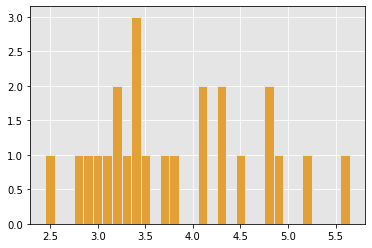

In [14]:
ax = plt.axes(facecolor = '#E5E5E5')
ax.set_axisbelow(True)
plt.grid(color = 'w', linestyle = 'solid')
plt.bar(kidney_red_blood[kidney_red_blood['red blood cells'] == 'abnormal']['red blood cell count'], kidney_red_blood[kidney_red_blood['red blood cells'] == 'abnormal']['size'], edgecolor = '#E5E5E5', color = '#E3A037', width = 0.1)
plt.show()

7.Pus Cell (nominal)
pc - (normal,abnormal)

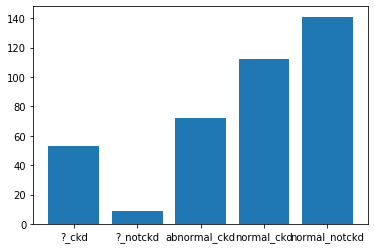

In [15]:
plot_category_class('pus cell')

8.Pus Cell clumps(nominal)
pcc - (present,notpresent)

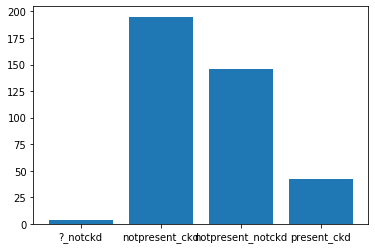

In [16]:
plot_category_class('pus cell clumps')

9.Bacteria(nominal)
ba - (present,notpresent)

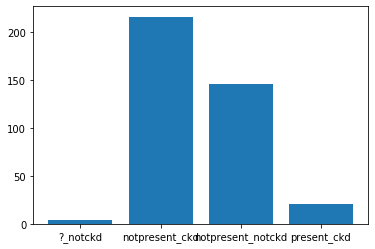

In [17]:
plot_category_class('bacteria')

10.Blood Glucose Random(numerical)
bgr in mgs/dl

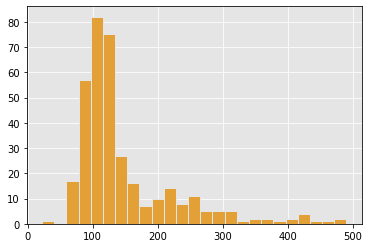

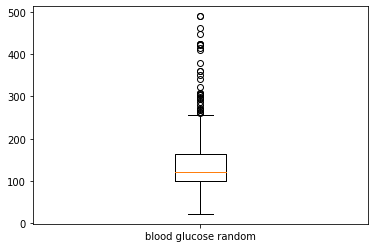

mean: 	 148.0365168539326
std: 	 79.28171423511773
min: 	 22
25%: 	 99.0
50%: 	 121.0
75%: 	 163.0
max: 	 490


In [18]:
hist_plot('blood glucose random', 25)
box_plot('blood glucose random')
summary('blood glucose random')

11.Blood Urea(numerical)
bu in mgs/dl

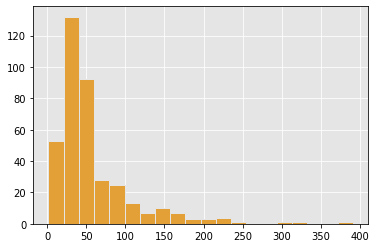

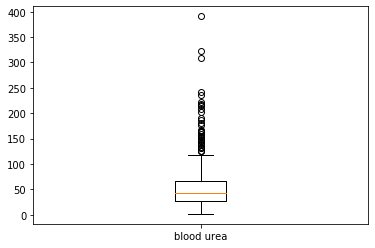

mean: 	 57.425721784776904
std: 	 50.50300584922251
min: 	 1.5
25%: 	 27.0
50%: 	 42.0
75%: 	 66.0
max: 	 391


In [19]:
hist_plot('blood urea', 20)
box_plot('blood urea')
summary('blood urea')

In [20]:
blood_urea_nan = (kidney[kidney['blood urea'] != '?'])
blood_urea_nan[blood_urea_nan['blood urea'] >= 57 + 51*4] 
# with too many other missing value
# Remove the extreme value

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
61,67,80,1.01,1,3,normal,abnormal,notpresent,notpresent,182,...,?,?,?,no,no,no,good,yes,no,ckd
145,57,90,1.015,5,0,abnormal,abnormal,notpresent,present,?,...,24,4200,3.3,yes,yes,yes,poor,yes,yes,ckd
249,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd


12.Serum Creatinine(numerical)
sc in mgs/dl

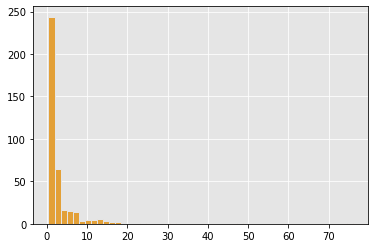

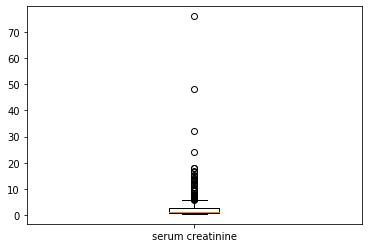

mean: 	 3.0724543080939934
std: 	 5.741126066859788
min: 	 0.4
25%: 	 0.9
50%: 	 1.3
75%: 	 2.8
max: 	 76


In [21]:
hist_plot('serum creatinine', 50)
box_plot('serum creatinine')
summary('serum creatinine')

In [22]:
serum_creatinine_nan = (kidney[kidney['serum creatinine'] != '?'])
serum_creatinine_nan[serum_creatinine_nan['serum creatinine'] >= 3 + 5*4] 
# with many other missing value
# Remove the extreme value in 2-4

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
6,68,70,1.01,0,0,?,normal,notpresent,notpresent,100,...,36,?,?,no,no,no,good,no,no,ckd
21,60,90,?,?,?,?,?,notpresent,notpresent,?,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd
61,67,80,1.01,1,3,normal,abnormal,notpresent,notpresent,182,...,?,?,?,no,no,no,good,yes,no,ckd
148,69,60,?,?,?,?,?,notpresent,notpresent,171,...,?,?,?,yes,no,no,poor,no,no,ckd


13.Sodium(numerical)
sod in mEq/L

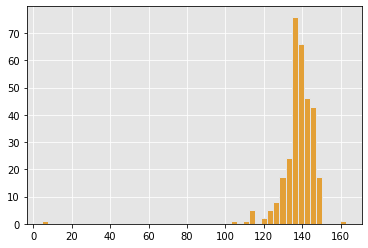

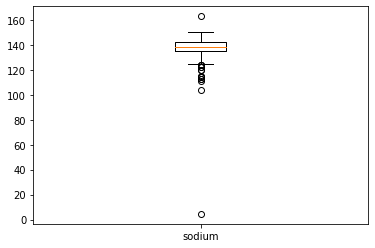

mean: 	 137.52875399361022
std: 	 10.408752051798782
min: 	 4.5
25%: 	 135.0
50%: 	 138.0
75%: 	 142.0
max: 	 163


In [23]:
hist_plot('sodium', 50)
box_plot('sodium')
summary('sodium')

In [24]:
sodium_nan = (kidney[kidney['sodium'] != '?'])
sodium_nan[sodium_nan['sodium'] <= 137 - 10*4]
# with many other missing value
# Remove the extreme value

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
21,60,90,?,?,?,?,?,notpresent,notpresent,?,...,32,6200,3.6,yes,yes,yes,good,no,no,ckd


14.Potassium(numerical)
pot in mEq/L

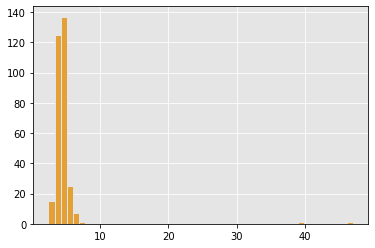

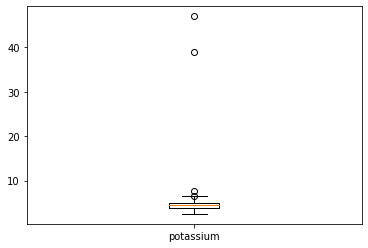

mean: 	 4.627243589743592
std: 	 3.1939041765566953
min: 	 2.5
25%: 	 3.8
50%: 	 4.4
75%: 	 4.9
max: 	 47


In [25]:
hist_plot('potassium', 50)
box_plot('potassium')
summary('potassium')

In [26]:
potassium_nan = (kidney[kidney['potassium'] != '?'])
potassium_nan[potassium_nan['potassium'] >= 4 + 3*4]
# with many other missing value & too extreme
# Remove the extreme value in 2-4

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
61,67,80,1.01,1,3,normal,abnormal,notpresent,notpresent,182,...,?,?,?,no,no,no,good,yes,no,ckd
128,52,90,1.015,4,3,normal,abnormal,notpresent,notpresent,224,...,23,5000,2.9,yes,yes,no,good,no,yes,ckd


15.Hemoglobin(numerical) hemo in gms

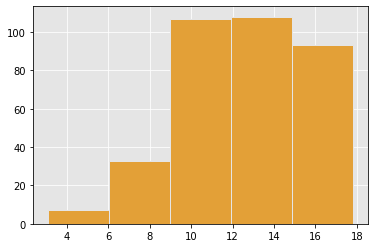

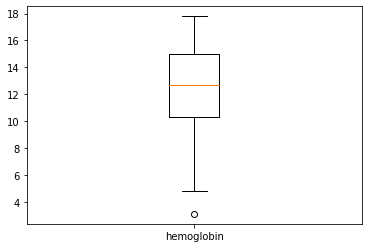

mean: 	 12.526436781609195
std: 	 2.912586608826764
min: 	 3.1
25%: 	 10.3
50%: 	 12.649999999999999
75%: 	 15.0
max: 	 17.8


In [27]:
hist_plot('hemoglobin', 5)
box_plot('hemoglobin')
summary('hemoglobin')

In [28]:
hemoglobin_nan = (kidney[kidney['hemoglobin'] != '?'])
hemoglobin_nan[hemoglobin_nan['hemoglobin'] <= 4]
# not removed (lied in acceptable range)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
249,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd


16.Packed Cell Volume(numerical)

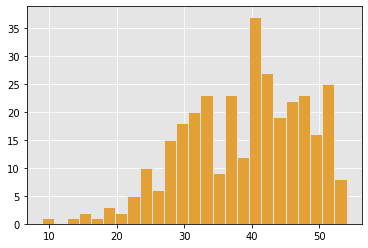

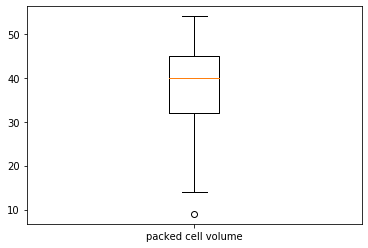

mean: 	 38.8719512195122
std: 	 9.00095508884333
min: 	 9
25%: 	 32.0
50%: 	 40.0
75%: 	 45.0
max: 	 54


In [29]:
hist_plot('packed cell volume', 25)
box_plot('packed cell volume')
summary('packed cell volume')

In [30]:
packed_nan = (kidney[kidney['packed cell volume'] != '?'])
packed_nan[packed_nan['packed cell volume'] <= 10]
#not removed (lied in acceptable range)

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
249,56,90,1.01,4,1,normal,abnormal,present,notpresent,176,...,9,5400,2.1,yes,yes,no,poor,yes,yes,ckd


17.White Blood Cell Count(numerical) wc in cells/cumm

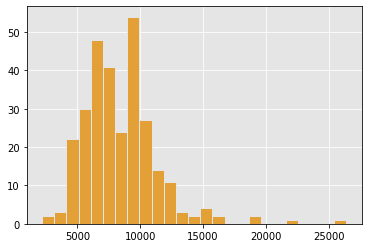

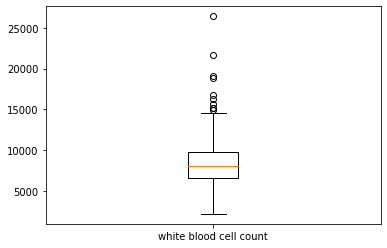

mean: 	 8425.773195876289
std: 	 2949.586003113288
min: 	 2200
25%: 	 6575.0
50%: 	 8000.0
75%: 	 9800.0
max: 	 26400


In [31]:
hist_plot('white blood cell count', 25)
box_plot('white blood cell count')
summary('white blood cell count')

In [32]:
wbcc_nan = (kidney[kidney['white blood cell count'] != '?'])
wbcc_nan[wbcc_nan['white blood cell count'] >= 8394 + 2986*4]
# with many other missing value & too extreme
# Remove the extreme value in 2-4

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
49,60,70,1.01,2,0,normal,abnormal,present,notpresent,144,...,29,21600,3.5,yes,yes,no,poor,no,yes,ckd
198,59,100,1.02,4,2,normal,normal,notpresent,notpresent,252,...,30,26400,3.9,yes,yes,no,poor,yes,no,ckd


18.Red Blood Cell Count(numerical)
rc in millions/cmm

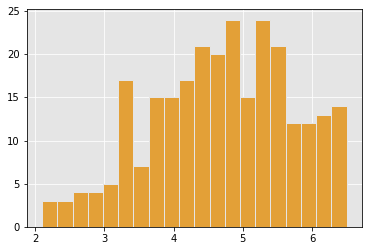

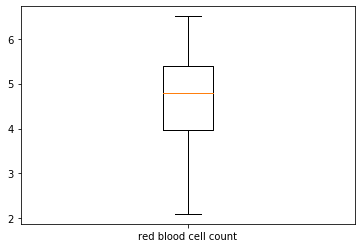

mean: 	 4.695864661654136
std: 	 1.0096243484636451
min: 	 2.1
25%: 	 3.975
50%: 	 4.8
75%: 	 5.4
max: 	 6.5


In [33]:
hist_plot('red blood cell count', 20)
box_plot('red blood cell count')
summary('red blood cell count')

19.Hypertension(nominal)
htn - (yes,no)

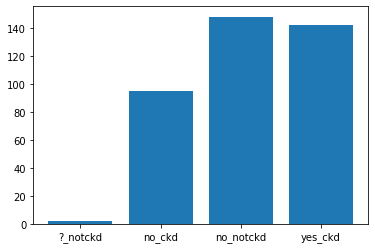

In [34]:
plot_category_class('hypertension')

20.Diabetes Mellitus(nominal)
dm - (yes,no)

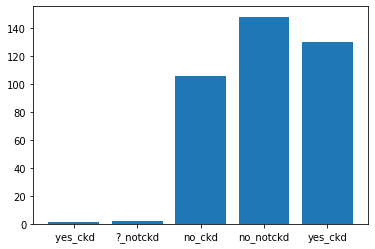

In [35]:
plot_category_class('diabetes mellitus')

21.Coronary Artery Disease(nominal)
cad - (yes,no)

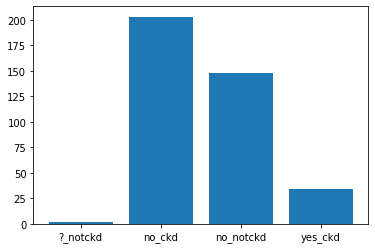

In [36]:
plot_category_class('coronary artery disease')

22.Appetite(nominal)
appet - (good,poor)

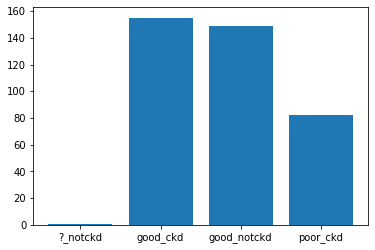

In [37]:
plot_category_class('appetite')

23.Pedal Edema(nominal)
pe - (yes,no)

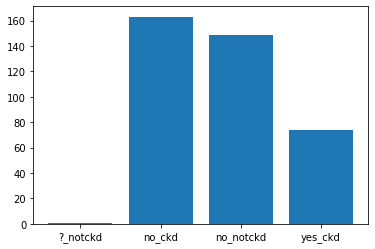

In [38]:
plot_category_class('pedal edema')

24.Anemia(nominal)
ane - (yes,no)

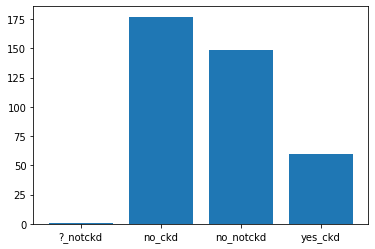

In [39]:
plot_category_class('anemia')

25.Class (nominal)
class - (ckd,notckd)

&lt;BarContainer object of 2 artists&gt;

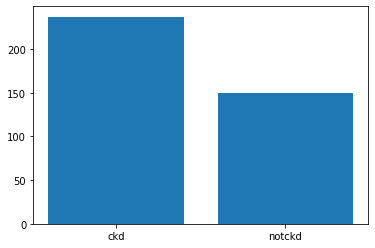

In [40]:
df = kidney.groupby(['class']).size().reset_index(name='size')
plt.bar(df['class'], df['size'])

### Correlations

In [41]:
kidney_corr = kidney
for col in kidney_corr:
    kidney_corr = kidney_corr[kidney_corr[col] != '?']
    kidney_corr = kidney_corr[kidney_corr[col].notnull()]

kidney_corr['age'] = kidney_corr['age'].apply(lambda x: int(x))
kidney_corr['age'] = pd.to_numeric(kidney_corr['age'])

kidney_corr['blood pressure'] = kidney_corr['blood pressure'].apply(lambda x: int(x))
kidney_corr['blood pressure'] = pd.to_numeric(kidney_corr['blood pressure'])

kidney_corr['specific gravity']= kidney_corr['specific gravity'].apply(lambda x: float(x))
kidney_corr['specific gravity'] = pd.to_numeric(kidney_corr['specific gravity'])

kidney_corr['albumin'] = kidney_corr['albumin'].apply(lambda x: int(x))
kidney_corr['albumin'] = pd.to_numeric(kidney_corr['albumin'])

kidney_corr['sugar'] = kidney_corr['sugar'].apply(lambda x: int(x))
kidney_corr['sugar'] = pd.to_numeric(kidney_corr['sugar'])

kidney_corr['blood glucose random'] = kidney_corr['blood glucose random'].apply(lambda x: int(x))
kidney_corr['blood glucose random'] = pd.to_numeric(kidney_corr['blood glucose random'])

kidney_corr['blood urea'] = kidney_corr['blood urea'].apply(lambda x: int(x))
kidney_corr['blood urea'] = pd.to_numeric(kidney_corr['blood urea'])

kidney_corr['serum creatinine'] = kidney_corr['serum creatinine'].apply(lambda x: float(x))
kidney_corr['serum creatinine'] = pd.to_numeric(kidney_corr['serum creatinine'])

kidney_corr['sodium'] = kidney_corr['sodium'].apply(lambda x: int(x))
kidney_corr['sodium'] = pd.to_numeric(kidney_corr['sodium'])

kidney_corr['potassium'] = kidney_corr['potassium'].apply(lambda x: float(x))
kidney_corr['potassium'] = pd.to_numeric(kidney_corr['potassium'])

kidney_corr['hemoglobin'].apply(lambda x: float(x))
kidney_corr['hemoglobin'] = pd.to_numeric(kidney_corr['hemoglobin'])

kidney_corr['packed cell volume'].apply(lambda x: int(x))
kidney_corr['packed cell volume'] = pd.to_numeric(kidney_corr['packed cell volume'])

kidney_corr['white blood cell count'].apply(lambda x: int(x))
kidney_corr['white blood cell count'] = pd.to_numeric(kidney_corr['white blood cell count'])

kidney_corr['red blood cell count'].apply(lambda x: float(x))
kidney_corr['red blood cell count'] = pd.to_numeric(kidney_corr['red blood cell count'])

In [42]:
corr_matrix = kidney_corr.iloc[:,0:26].corr()
corr_matrix.style.background_gradient(cmap='coolwarm')

,age,blood pressure,specific gravity,albumin,sugar,blood glucose random,blood urea,serum creatinine,sodium,potassium,hemoglobin,packed cell volume,white blood cell count,red blood cell count
age,1.000000,0.061907,-0.280359,0.245183,0.211471,0.305418,0.183201,0.186599,-0.101149,0.006411,-0.244119,-0.232780,0.154030,-0.279126
blood pressure,0.061907,1.000000,-0.184374,0.296019,0.254398,0.196734,0.297988,0.377532,-0.220579,0.128188,-0.276108,-0.350418,0.011418,-0.285322
specific gravity,-0.280359,-0.184374,1.000000,-0.701368,-0.468342,-0.560403,-0.528214,-0.545045,0.537033,-0.072227,0.679921,0.683643,-0.310430,0.659980
albumin,0.245183,0.296019,-0.701368,1.000000,0.549396,0.538989,0.646223,0.692847,-0.602554,0.211941,-0.789874,-0.786384,0.337499,-0.718810
sugar,0.211471,0.254398,-0.468342,0.549396,1.000000,0.730246,0.325179,0.359674,-0.246022,0.272834,-0.391469,-0.408406,0.199955,-0.386214
blood glucose random,0.305418,0.196734,-0.560403,0.538989,0.730246,1.000000,0.334430,0.338083,-0.286271,0.102323,-0.437240,-0.445516,0.212565,-0.427979
blood urea,0.183201,0.297988,-0.528214,0.646223,0.325179,0.334430,1.000000,0.893370,-0.488803,0.246353,-0.709559,-0.708267,0.140579,-0.675378
serum creatinine,0.186599,0.377532,-0.545045,0.692847,0.359674,0.338083,0.893370,1.000000,-0.528643,0.140541,-0.720783,-0.728087,0.136253,-0.680939
sodium,-0.101149,-0.220579,0.537033,-0.602554,-0.246022,-0.286271,-0.488803,-0.528643,1.000000,-0.049557,0.579697,0.567991,-0.181458,0.484858
potassium,0.006411,0.128188,-0.072227,0.211941,0.272834,0.102323,0.246353,0.140541,-0.049557,1.000000,-0.191040,-0.212720,-0.106590,-0.200493


---
## 2-2 Remove the observation without “class” value

In [43]:
print('Total observations: ' + str(len(kidney)))
print('Count of the observation without class value: ' + str(len(kidney[kidney['class'].isnull()])))
print('Count of the observation with class value: ' + str(len(kidney[kidney['class'].notnull()])))

kidney = kidney[kidney['class'].notnull()]

Total observations: 400
Count of the observation without class value: 13
Count of the observation with class value: 387


---
## 2-3 identify the outlier / Impute the missing value

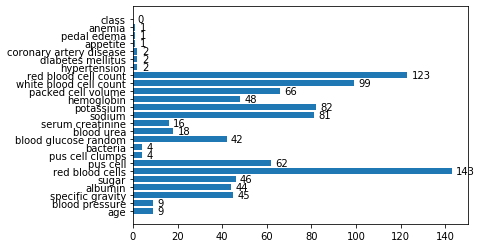

In [44]:
plt_na_dist(kidney)

### Deal with missing value - 1. The variables with less missing value
1. start checking the variable with less missing value 
2. remove the rows that contains more than 3 missing values (which variable has less than 10 missing values)

In [45]:
# 'anemia'
kidney[kidney['anemia'] == '?']

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
294,75,60,1.02,0,0,normal,normal,notpresent,notpresent,110,...,40,8300,5.8,no,no,no,?,?,?,notckd


In [46]:
# 'hypertension'
kidney[kidney['hypertension'] == '?']

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
288,56,70,1.025,0,0,normal,normal,notpresent,notpresent,70,...,50,11000,5.1,?,?,?,good,no,no,notckd
297,53,60,1.025,0,0,normal,normal,notpresent,notpresent,116,...,45,7700,5.2,?,?,?,good,no,no,notckd


In [47]:
# 'bacteria'
kidney[kidney['bacteria'] == '?']

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
290,54,70,1.02,0,0,?,?,?,?,76,...,52,8400,5.9,no,no,no,good,no,no,notckd
300,45,60,1.02,0,0,normal,normal,?,?,114,...,43,9200,5.8,no,no,no,good,no,no,notckd
316,35,?,1.02,0,0,normal,normal,?,?,99,...,48,5000,5.2,no,no,no,good,no,no,notckd
328,28,70,1.02,0,0,normal,normal,?,?,131,...,45,8600,6.5,no,no,no,good,no,no,notckd


#### Process:
- The row misses 'anemia' value also miss the values of 'Pedal Edema', 'Appetite'. Therefore, remove the row.
- The rows miss 'hypertension' value also miss the values of 'Diabetes Mellitus', 'Coronary Artery Disease'. Therefore, remove the rows.
- The rows miss 'bacteria' value also miss other values. Therefore, remove the rows.

In [48]:
kidney = kidney[kidney['anemia'] != '?']
kidney = kidney[kidney['hypertension'] != '?']
kidney = kidney[kidney['bacteria'] != '?']

In [49]:
# 'blood pressure'
kidney[kidney['blood pressure'] == '?']

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
7,24,?,1.015,2,4,normal,abnormal,notpresent,notpresent,410,...,44,6900,5,no,yes,no,good,yes,no,ckd
75,5,?,1.015,1,0,?,normal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,no,yes,ckd
132,50,?,?,?,?,normal,?,notpresent,notpresent,219,...,24,13200,2.7,yes,no,no,good,yes,yes,ckd
161,62,?,1.015,3,0,abnormal,?,notpresent,notpresent,?,...,42,10200,4.8,yes,yes,no,good,no,no,ckd
164,14,?,1.015,0,0,?,?,notpresent,notpresent,192,...,40,9500,5.4,no,yes,no,poor,yes,no,ckd
187,3,?,1.01,2,0,normal,normal,notpresent,notpresent,?,...,34,12300,?,no,no,no,good,no,no,ckd
215,2,?,1.01,3,0,normal,abnormal,notpresent,notpresent,?,...,?,?,?,no,no,no,good,yes,no,ckd
293,50,?,1.02,0,0,normal,normal,notpresent,notpresent,92,...,48,4700,5.4,no,no,no,good,no,no,notckd


In [50]:
# 'age'
kidney[kidney['age'] == '?']

,age,blood pressure,specific gravity,albumin,sugar,red blood cells,pus cell,pus cell clumps,bacteria,blood glucose random,...,packed cell volume,white blood cell count,red blood cell count,hypertension,diabetes mellitus,coronary artery disease,appetite,pedal edema,anemia,class
30,?,70,?,?,?,?,?,notpresent,notpresent,93,...,?,?,?,yes,yes,no,good,no,no,ckd
73,?,100,1.015,2,0,abnormal,abnormal,notpresent,notpresent,129,...,14,6300,?,yes,no,no,good,yes,yes,ckd
112,?,60,1.015,3,0,abnormal,abnormal,notpresent,notpresent,?,...,33,?,?,no,no,no,good,no,no,ckd
116,?,70,1.015,4,0,abnormal,normal,notpresent,notpresent,104,...,?,?,?,no,no,no,good,yes,no,ckd
117,?,70,1.02,0,0,?,?,notpresent,notpresent,219,...,37,9800,4.4,no,no,no,good,no,no,ckd
169,?,70,1.01,0,2,?,normal,notpresent,notpresent,220,...,27,?,?,yes,yes,no,good,no,yes,ckd
191,?,70,1.01,3,0,normal,normal,notpresent,notpresent,110,...,26,9200,3.4,yes,yes,no,poor,no,no,ckd
203,?,90,?,?,?,?,?,notpresent,notpresent,207,...,?,?,?,yes,yes,no,good,no,yes,ckd
268,?,80,?,?,?,?,?,notpresent,notpresent,100,...,53,8500,4.9,no,no,no,good,no,no,notckd


- The rows miss 'age' or 'blood pressure' value also miss many other values. Therefore, remove the rows.

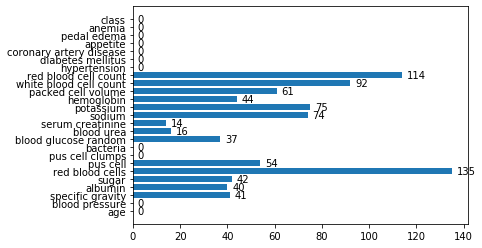

In [51]:
kidney = kidney[kidney['age'] != '?']
kidney = kidney[kidney['blood pressure'] != '?']
plt_na_dist(kidney)

### Deal with missing value - 2. Impute missing values for 'red blood cells'
參考 2-2 敘述性統計部分

In [52]:
kidney.groupby(['red blood cells', 'class']).size().reset_index(name='size')

,red blood cells,class,size
0,?,ckd,128
1,?,notckd,7
2,abnormal,ckd,41
3,normal,ckd,53
4,normal,notckd,134


In [53]:
rbcc_count = kidney.groupby(['red blood cell count', 'class']).size().reset_index(name='size')
rbcc_count[rbcc_count['red blood cell count'] == '?']

,red blood cell count,class,size
55,?,ckd,107
56,?,notckd,7


#### 0. Add new label 'red blood missing' if the value of 'red blood cells' or 'red blood cell count' is missing

In [54]:
kidney = kidney.reset_index()
kidney['red blood missing'] = [0] * len(kidney)
for i in range(0, len(kidney)):
    if kidney['red blood cells'][i] == '?' or kidney['red blood cell count'][i] == '?':
        kidney['red blood missing'][i] = 1
kidney = kidney.drop(columns=['index'])

#### 1. 未缺值者 class 為 'notckd' 者 'red blood cells'必為'normal' → 將 class = notckd 且 'red blood cells' 缺值者補值為 'normal'


In [55]:
for i in range(0, len(kidney)):
    if kidney['red blood cells'][i] == '?' and kidney['class'][i] == 'notckd':
        kidney['red blood cells'][i] = 'normal'

#### 2. Impute other 'red blood cells' with class = ckd - Compare with 'red blood cell count'
**According to the dscriptive descriptive statistics in 2-1**
- 'Normal' red blood cells: Negative skew and most of the values > 4
- 'Abnormal' red blood cells: Postive skew and most of the values < 4.5
- Both values of 'red blood cells' and 'red blood cell count' are missing (All 'class'are ckd, size = 71): randomly impute normal or abnormal

In [56]:
print('mean normal red blood cells count: \t', kidney_red_blood[kidney_red_blood['red blood cells'] == 'normal']['red blood cell count'].mean())
print('mean abnormal red blood cells count: \t', kidney_red_blood[kidney_red_blood['red blood cells'] == 'abnormal']['red blood cell count'].mean())

mean normal red blood cells count: 	 4.541860465116279
mean abnormal red blood cells count: 	 3.811111111111111


- impute red blood cells which class = ckd and red blood cell count >= 4.5 with 'normal'
- impute red blood cells which class = ckd and red blood cell count < 4.5 with 'abnormal'

In [57]:
for i in range(0, len(kidney)):
    if kidney['red blood cell count'][i] != '?':
        if kidney['red blood cells'][i] == '?' and float(kidney['red blood cell count'][i]) >= 4.5:
            kidney['red blood cells'][i] = 'normal'
        if kidney['red blood cells'][i] == '?' and float(kidney['red blood cell count'][i]) < 4.5:
            kidney['red blood cells'][i] = 'abnormal'
    elif kidney['red blood cell count'][i] == '?' and kidney['red blood cells'][i] == '?':
        ran = random.randint(1,2)
        if ran == 1:
            kidney['red blood cells'][i] = 'normal'
        else:
            kidney['red blood cells'][i] = 'abnormal'

### Deal with missing value - 3. Impute missing values for 'pus cell'
#### According to the descriptive statistics in 2-1:
- All ('class' = notckd) values are 'normal' - Impute missing values of 'pus cell' = ***'normal'*** which 'class' = 'notckd'
- In the cases ('class' = ckd), the ratio 'abnormal' to 'normal' is about 2/3 - Impute randomly at the ratio 2/3

In [58]:
for i in range(0, len(kidney)):
    if kidney['pus cell'][i] == '?' and kidney['class'][i] == 'notckd':
        kidney['pus cell'][i] = 'normal'
    elif kidney['pus cell'][i] == '?' and kidney['class'][i] == 'ckd':
        ran = random.randint(1,5)
        if ran == 1 or ran == 2 or ran == 3:
            kidney['pus cell'][i] = 'normal'
        else:
            kidney['pus cell'][i] = 'abnormal'

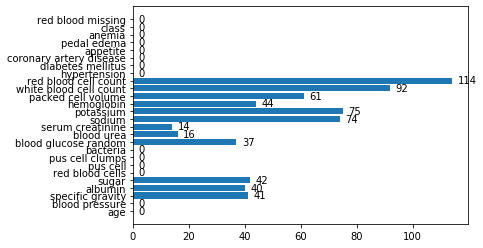

In [59]:
plt_na_dist(kidney)

### Deal with missing value - 4. Use fillna impute missing value for numerical variables

In [60]:
nan = np.nan

kidney.replace('?', nan, inplace=True)
kidney = kidney.fillna(method='bfill')

### Deal with extreme value
According to the observations in Q2-(1) descriptive statistics and plots

In [61]:
kidney = kidney[kidney['serum creatinine'] < 3 + 5*4].reset_index(drop=True)
kidney = kidney[kidney['sodium'] > 137 - 10*4].reset_index(drop=True)
kidney = kidney[kidney['potassium'] < 4 + 3*4].reset_index(drop=True)
kidney = kidney[kidney['white blood cell count'] < 8394 + 2986*4].reset_index(drop=True)

---
## 2-4 Transform the categorical variable to dummy variable

In [62]:
# red blood cells
kidney['dummy red blood cells'] = pd.DataFrame(map(lambda x: 1 if x == 'abnormal' else 0, kidney['red blood cells']))
# pus cell clumps
kidney['dummy pus cell clumps'] = pd.DataFrame(map(lambda x: 1 if x == 'present' else 0, kidney['pus cell clumps']))
# bacteria
kidney['dummy bacteria'] = pd.DataFrame(map(lambda x: 1 if x == 'present' else 0, kidney['bacteria']))
# hypertension
kidney['dummy hypertension'] = pd.DataFrame(map(lambda x: 1 if x == 'yes' else 0, kidney['hypertension']))
# diabetes mellitus
kidney['dummy diabetes mellitus'] = pd.DataFrame(map(lambda x: 1 if x == 'yes' else 0, kidney['diabetes mellitus']))
# coronary artery disease
kidney['dummy coronary artery disease'] = pd.DataFrame(map(lambda x: 1 if x == 'yes' else 0, kidney['coronary artery disease']))
# appetite
kidney['dummy appetite'] = pd.DataFrame(map(lambda x: 1 if x == 'poor' else 0, kidney['appetite']))
# pedal edema
kidney['dummy pedal edema'] = pd.DataFrame(map(lambda x: 1 if x == 'yes' else 0, kidney['pedal edema']))
# anemia
kidney['dummy anemia'] = pd.DataFrame(map(lambda x: 1 if x == 'yes' else 0, kidney['anemia']))
# class
kidney['dummy class'] = pd.DataFrame(map(lambda x: 1 if x == 'ckd' else 0, kidney['class']))

---
## 2-5 Randomly split the dataset into training dataset and testing dataset


In [63]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, linear_model
from sklearn.feature_selection import f_regression

#### Split the dataset 'kidnet' to training dataset and testing dataset. The ratio is 80 to 20.
(72 rows for testing set and 284 rows in training set)

In [64]:
kidney_train, kidney_test = train_test_split(kidney, test_size=0.2)

---
## 2-6 Predict the “Class” by GLM
- Reference: https://ithelp.ithome.com.tw/articles/10187047

In [65]:
# Create train_X
train_x = pd.DataFrame([kidney_train["age"],
                        kidney_train["blood pressure"],
                        kidney_train["specific gravity"],
                        kidney_train["albumin"],
                        kidney_train["sugar"],
                        kidney_train["blood glucose random"],
                        kidney_train["blood urea"],
                        kidney_train["serum creatinine"],
                        kidney_train["sodium"],
                        kidney_train["potassium"],
                        kidney_train["hemoglobin"],
                        kidney_train["packed cell volume"],
                        kidney_train["white blood cell count"],
                        kidney_train["red blood cell count"],
                        kidney_train["dummy red blood cells"],
                        kidney_train["dummy pus cell clumps"],
                        kidney_train["dummy bacteria"],
                        kidney_train["dummy hypertension"],
                        kidney_train["dummy diabetes mellitus"],
                        kidney_train["dummy coronary artery disease"],
                        kidney_train["dummy appetite"],
                        kidney_train["dummy pedal edema"],
                        kidney_train["dummy anemia"]
                        ]).T

# Creat Model
logistic_regr = linear_model.LogisticRegression()
logistic_regr.fit(train_x, kidney_train["dummy class"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class=&#39;auto&#39;, n_jobs=None, penalty=&#39;l2&#39;,
                   random_state=None, solver=&#39;lbfgs&#39;, tol=0.0001, verbose=0,
                   warm_start=False)

### Report of the Model

In [66]:
output = pd.DataFrame({'variable': ['(intercept)'], 'coefficient': logistic_regr.intercept_}).append(pd.DataFrame({'variable': list(train_x.columns), 'coefficient': logistic_regr.coef_.tolist()[0]}))
pv = pd.DataFrame({'variable': list(train_x.columns), 'p-value': list(f_regression(train_x, kidney_train["dummy class"])[1])})
pd.merge(output, pv, how="outer")

,variable,coefficient,p-value
0,(intercept),0.002526,NaN
1,age,-0.021919,2.775977e-06
2,blood pressure,0.102885,6.075945e-08
3,specific gravity,0.002032,2.046498e-48
4,albumin,0.085499,2.240871e-30
5,sugar,0.028027,1.015965e-09
6,blood glucose random,0.030409,1.938909e-12
7,blood urea,0.016886,8.013326e-12
8,serum creatinine,0.099226,1.403001e-15
9,sodium,0.018694,4.139388e-20


In [67]:
test_x = pd.DataFrame([kidney_test["age"],
                        kidney_test["blood pressure"],
                        kidney_test["specific gravity"],
                        kidney_test["albumin"],
                        kidney_test["sugar"],
                        kidney_test["blood glucose random"],
                        kidney_test["blood urea"],
                        kidney_test["serum creatinine"],
                        kidney_test["sodium"],
                        kidney_test["potassium"],
                        kidney_test["hemoglobin"],
                        kidney_test["packed cell volume"],
                        kidney_test["white blood cell count"],
                        kidney_test["red blood cell count"],
                        kidney_test["dummy red blood cells"],
                        kidney_test["dummy pus cell clumps"],
                        kidney_test["dummy bacteria"],
                        kidney_test["dummy hypertension"],
                        kidney_test["dummy diabetes mellitus"],
                        kidney_test["dummy coronary artery disease"],
                        kidney_test["dummy appetite"],
                        kidney_test["dummy pedal edema"],
                        kidney_test["dummy anemia"]
                        ]).T

kidney_predictions = logistic_regr.predict(test_x)
accuracy = logistic_regr.score(test_x, kidney_test["dummy class"])

print(accuracy)

0.875


### The Accuracy of the model is about 0.9. All variables are statistically significant.
We could conclude that the model fit well to predict the category of class.

In [68]:
compare = pd.DataFrame({'Actual Value': kidney_test["dummy class"], 'Prediction': list(kidney_predictions)}).transpose()
compare

,298,322,144,182,146,294,201,87,263,351,...,85,273,58,328,169,33,1,313,343,186
Actual Value,0,0,1,1,1,0,1,1,0,0,...,1,0,1,0,1,1,1,0,0,1
Prediction,0,0,1,1,1,0,1,1,1,0,...,1,0,1,0,1,1,1,0,0,1
